### Importing Libraries

In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

#### Importing data (csv) into Pandas dataframe

In [316]:
data = pd.read_csv("price_data.csv")
print(data.shape)
data.head()

(18445, 8)


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
1,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
2,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
3,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
4,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [317]:
# make a copy of the dataset to work with
df = data.copy()

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18445 entries, 0 to 18444
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       18445 non-null  float64
 1   bathrooms      18445 non-null  float64
 2   toilets        18445 non-null  float64
 3   parking_space  18445 non-null  float64
 4   title          18445 non-null  object 
 5   town           18445 non-null  object 
 6   state          18445 non-null  object 
 7   price          18445 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


There are no missing values in the dataset.

##### Summary Statistics of all features

In [319]:
df.describe(include="all")

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
count,18445.000000,18445.000000,18445.000000,18445.000000,18445,18445,18445,1.844500e+04
unique,NaN,NaN,NaN,NaN,7,48,1,NaN
top,NaN,NaN,NaN,NaN,Detached Duplex,Lekki,Lagos,NaN
freq,NaN,NaN,NaN,NaN,11802,10841,18445,NaN
mean,4.409325,4.649119,5.274221,4.037680,NaN,NaN,NaN,3.457721e+08
std,1.036882,1.067630,1.124706,1.307827,NaN,NaN,NaN,1.399940e+10
min,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,NaN,NaN,NaN,6.000000e+07
50%,4.000000,5.000000,5.000000,4.000000,NaN,NaN,NaN,9.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,NaN,NaN,NaN,1.700000e+08


The summary statistics shows that:
- The maximum `bedrooms`, `bathrooms`, `parking_space` and `toilets` are 9.
- There are 1 `states` in the dataset - Lagos.
- There are 7 unique `title` in the dataset.
- There are 48 `town` in the dataset.
- The highest apartment `price` is over `1,800,000,000,000` naira.
- The lowest apartment `price` is `90,000`

In [320]:
#checking the unique towns
df["town"].unique()

array(['Lekki', 'Ajah', 'Epe', 'Victoria Island (VI)', 'Ikeja', 'Ikoyi',
       'Magodo', 'Ibeju Lekki', 'Yaba', 'Ifako-Ijaiye', 'Agege',
       'Ikorodu', 'Isheri North', 'Isheri', 'Ipaja', 'Mushin', 'Ejigbo',
       'Isolo', 'Ojodu', 'Alimosho', 'Shomolu', 'Ogudu', 'Surulere',
       'Ayobo', 'Ikotun', 'Maryland', 'Gbagada', 'Idimu', 'Ojo', 'Kosofe',
       'Ilupeju', 'Ketu', 'Ojota', 'Oshodi', 'Amuwo Odofin', 'Ijede',
       'Agbara-Igbesa', 'Ijaiye', 'Apapa', 'Lagos Island', 'Badagry',
       'Oke-Odo', 'Egbe', 'Orile', 'Eko Atlantic City', 'Imota', 'Ijesha',
       'Ibeju'], dtype=object)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18445 entries, 0 to 18444
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       18445 non-null  float64
 1   bathrooms      18445 non-null  float64
 2   toilets        18445 non-null  float64
 3   parking_space  18445 non-null  float64
 4   title          18445 non-null  object 
 5   town           18445 non-null  object 
 6   state          18445 non-null  object 
 7   price          18445 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


No missing values found in the dataset

#### Duplicated Rows

In [322]:
# How many duplicates are there in the dataset
print(f"There are {df.duplicated().sum()} duplicated rows in the dataset")


print(f"Shape with duplicates: {df.shape}")

# Removing duplicates
df = df.drop_duplicates()
print(f"Shape without duplicates: {df.shape}")

There are 9874 duplicated rows in the dataset
Shape with duplicates: (18445, 8)
Shape without duplicates: (8571, 8)


#### Exploring outliers: Bedrooms vs Toilets

In [323]:
# apartments with less than 4 bedrooms with 9 toilets
df[(df['toilets'] == 9) & (df["bedrooms"] < 4) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
87,2.0,5.0,9.0,4.0,Detached Bungalow,Ibeju Lekki,Lagos,3.000000e+07
4236,3.0,9.0,9.0,6.0,Block of Flats,Agege,Lagos,3.500000e+07
4993,1.0,8.0,9.0,4.0,Detached Duplex,Victoria Island (VI),Lagos,1.400000e+09
11308,3.0,9.0,9.0,9.0,Detached Duplex,Ikorodu,Lagos,4.500000e+07


An housing apartment with 4 or less bedrooms having 9 toilets is too extreme.

In [324]:
# dropping these extreme rows [126, 5574, 6566, 9163, 13501, 14846, 18542, 22614, 23141]
df.drop(df[(df['toilets'] == 9) & (df["bedrooms"] < 4)].index.to_list(), axis=0, inplace=True)
df.shape

(8567, 8)

In [325]:
# apartments with less than 3 bedrooms with 8 toilets
df[(df['toilets'] == 8) & (df["bedrooms"] < 3) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
1863,2.0,8.0,8.0,4.0,Block of Flats,Ajah,Lagos,45000000.0
11674,2.0,5.0,8.0,4.0,Block of Flats,Agege,Lagos,27999999.0
12163,1.0,1.0,8.0,1.0,Semi Detached Duplex,Isolo,Lagos,120000000.0
12915,2.0,8.0,8.0,4.0,Block of Flats,Ketu,Lagos,40000000.0
15928,1.0,6.0,8.0,4.0,Detached Bungalow,Ikorodu,Lagos,45000000.0


In [326]:
# dropping these extreme rows [ 2525,  4169,  4176, 13626, 14047, 14263, 14675, 15333, 15965, 16971, 18217, 20737, 20947, 21264]
df.drop(df[(df['toilets'] == 8) & (df["bedrooms"] < 3) ].index.to_list(), axis=0, inplace=True)
df.shape

(8561, 8)

In [327]:
# apartments with less than 3 bedrooms with 7 toilets
df[(df['toilets'] == 7) & (df["bedrooms"] < 3) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
11358,1.0,7.0,7.0,1.0,Terraced Bungalow,Alimosho,Lagos,80000000.0


In [328]:
# dropping this extreme row 14917
df.drop(df[(df['toilets'] ==7) & (df["bedrooms"] < 3) ].index.to_list(), axis=0, inplace=True)
df.shape

(8560, 8)

In [329]:
# apartments with less than 2 bedrooms with 6 toilets
df[(df['toilets'] == 6) & (df["bedrooms"] < 2)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price


In [330]:
# dropping this extreme row 7287
df.drop(df[(df['toilets'] == 6) & (df["bedrooms"] < 2) ].index.to_list(), axis=0, inplace=True)
df.shape

(8560, 8)

In [331]:
# apartments with 9 bedrooms having less than 4 toilets
df[(df['bedrooms'] == 9) & (df["toilets"] < 4)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
131,9.0,9.0,1.0,1.0,Detached Duplex,Isolo,Lagos,7.000000e+07
267,9.0,9.0,1.0,8.0,Detached Duplex,Lekki,Lagos,2.500000e+08
530,9.0,9.0,1.0,4.0,Detached Duplex,Surulere,Lagos,9.500000e+07
675,9.0,9.0,1.0,4.0,Detached Duplex,Lekki,Lagos,3.200000e+08
1288,9.0,9.0,1.0,6.0,Detached Duplex,Ikoyi,Lagos,1.500000e+09


These records are extreme. An housing apartments with 9 `bedrooms` but having less than 4 toilets?!

In [332]:
# dropping these extreme rows
df.drop(df[(df['bedrooms'] == 9) & (df["toilets"] < 4)].index.to_list(), axis=0, inplace=True)
df.shape

(8539, 8)

In [333]:
# apartments with 8 bedrooms having less than 3 toilets
df[(df['bedrooms'] == 8) & (df["toilets"] <3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2473,8.0,8.0,1.0,5.0,Detached Duplex,Ajah,Lagos,40000000.0
5467,8.0,8.0,1.0,1.0,Detached Duplex,Ikoyi,Lagos,750000000.0
5820,8.0,1.0,1.0,1.0,Block of Flats,Ajah,Lagos,65000000.0
6689,8.0,1.0,1.0,2.0,Detached Duplex,Victoria Island (VI),Lagos,380000000.0
9052,8.0,8.0,1.0,4.0,Detached Duplex,Ikoyi,Lagos,650000000.0


In [334]:
# dropping these extreme rows
df.drop(df[(df['bedrooms'] == 8) & (df["toilets"] < 4)].index.to_list(), axis=0, inplace=True)
df.shape

(8529, 8)

In [335]:
# apartments with 7 bedrooms having less than 3 toilets
df[(df['bedrooms'] == 7) & (df["toilets"] <3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
735,7.0,7.0,1.0,6.0,Detached Duplex,Ojo,Lagos,2.500000e+07
3153,7.0,7.0,1.0,1.0,Detached Duplex,Ikeja,Lagos,7.000000e+08
5096,7.0,9.0,1.0,1.0,Detached Duplex,Ikoyi,Lagos,1.000000e+09
5391,7.0,5.0,1.0,2.0,Detached Duplex,Lekki,Lagos,2.700000e+08
7304,7.0,5.0,1.0,4.0,Detached Duplex,Ajah,Lagos,4.500000e+07


In [336]:
# dropping these extreme rows
df.drop(df[(df['bedrooms'] == 7) & (df["toilets"] < 3)].index.to_list(), axis=0, inplace=True)
df.shape

(8522, 8)

In [337]:
# apartments with 6 bedrooms having less than 3 toilets
df[(df['bedrooms'] == 6) & (df["toilets"] <3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3823,6.0,1.0,1.0,5.0,Detached Duplex,Isheri North,Lagos,140000000.0
4265,6.0,1.0,1.0,1.0,Detached Duplex,Ikeja,Lagos,490000000.0
4399,6.0,2.0,2.0,6.0,Detached Bungalow,Idimu,Lagos,10000000.0
6340,6.0,2.0,2.0,8.0,Detached Bungalow,Alimosho,Lagos,15000000.0
9304,6.0,8.0,1.0,1.0,Detached Duplex,Isheri North,Lagos,150000000.0


In [338]:
# dropping these extreme rows
df.drop(df[(df['bedrooms'] == 6) & (df["toilets"] < 3)].index.to_list(), axis=0, inplace=True)
df.shape

(8511, 8)

#### Exploring outliers: Bedrooms vs Bathrooms

In [339]:
df[(df['bathrooms'] == 8) & (df["bedrooms"] < 3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
7464,1.0,8.0,1.0,6.0,Block of Flats,Ijaiye,Lagos,45000000.0


This is too extreme!

In [340]:
# dropping this extreme row 9786
df.drop(df[(df['bathrooms'] == 8) & (df["bedrooms"] < 3)].index.to_list(), axis=0, inplace=True)
df.shape

(8510, 8)

In [341]:
# apartments with 9 bedrooms having less than 4 bathrooms
df[(df['bedrooms'] == 9) & (df["bathrooms"] < 4)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
6563,9.0,3.0,6.0,4.0,Detached Duplex,Ajah,Lagos,200000000.0
17759,9.0,1.0,9.0,9.0,Detached Duplex,Ojo,Lagos,50000000.0


In [342]:
# dropping these extreme rows
df.drop(df[(df['bedrooms'] == 9) & (df["bathrooms"] < 4)].index.to_list(), axis=0, inplace=True)
df.shape

(8508, 8)

In [343]:
# apartments with 8 bedrooms having less than 4 bathrooms
df[(df['bedrooms'] == 8) & (df["bathrooms"] < 4)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price


In [344]:
# dropping this extreme row
df.drop(df[(df['bedrooms'] == 8) & (df["bathrooms"] < 4)].index.to_list(), axis=0, inplace=True)
df.shape

(8508, 8)

In [345]:
# apartments with 7 bedrooms having less than 3 bathrooms
df[(df['bedrooms'] == 7) & (df["bathrooms"] < 3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price


In [346]:
# dropping this extreme row
df.drop(df[(df['bedrooms'] == 7) & (df["bathrooms"] < 3)].index.to_list(), axis=0, inplace=True)
df.shape

(8508, 8)

In [347]:
# apartments with 6 bedrooms having less than 3 bathrooms
df[(df['bedrooms'] == 6) & (df["bathrooms"] < 3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
16058,6.0,2.0,6.0,4.0,Semi Detached Bungalow,Ikorodu,Lagos,16000000.0


In [348]:
# dropping these extreme rows
df.drop(df[(df['bedrooms'] == 6) & (df["bathrooms"] < 3)].index.to_list(), axis=0, inplace=True)
df.shape

(8507, 8)

In [349]:
# apartments where bathrooms > 6 and toilets < 3 or bathrooms < 3 and toilets > 6
df[((df['bathrooms'] > 6) & (df["toilets"] < 3)) | ((df['bathrooms'] < 3) & (df["toilets"] > 6))].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
7335,4.0,8.0,1.0,7.0,Detached Duplex,Maryland,Lagos,150000000.0
12836,5.0,1.0,9.0,4.0,Detached Duplex,Ikorodu,Lagos,40000000.0
13380,3.0,8.0,1.0,6.0,Block of Flats,Ojo,Lagos,28000000.0
17578,5.0,2.0,7.0,4.0,Detached Duplex,Ibeju Lekki,Lagos,107000000.0


In [350]:
# dropping these extreme rows
df.drop(df[((df['bathrooms'] > 6) & (df["toilets"] < 3)) | ((df['bathrooms'] < 3) & (df["toilets"] > 6))].index.to_list(),
        inplace=True, axis=0)
df.shape

(8503, 8)

#### Exploring outliers: Apartment Features vs Price

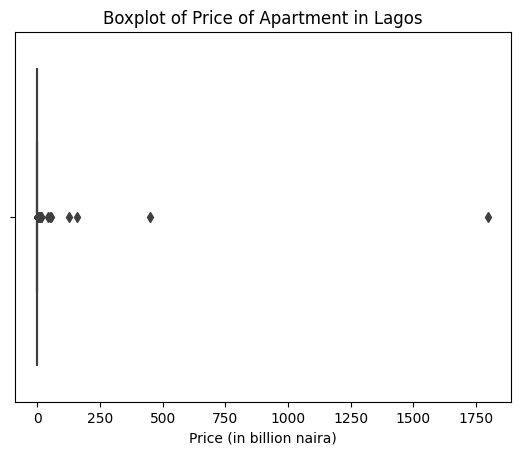

In [351]:
sns.boxplot(x=df["price"]/1e9, orient="h")
plt.xlabel("Price (in billion naira)")
plt.title("Boxplot of Price of Apartment in Lagos");

In [352]:
#The apartment with the minimum price
df[df["price"] == df["price"].min()]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
1989,2.0,3.0,3.0,4.0,Terraced Duplexes,Ibeju Lekki,Lagos,90000.0


- The boxplot shows that there are outliers in `price`.
- Also, looking at the minimum amount, it shows that the cheatest apartment price of a two-bedroom apartment in Ibeju-Lekki is`90,000` naira.

The original DataFrame had shape: (8503, 8)
The new DataFrame after removing outliers has shape: (7348, 8)


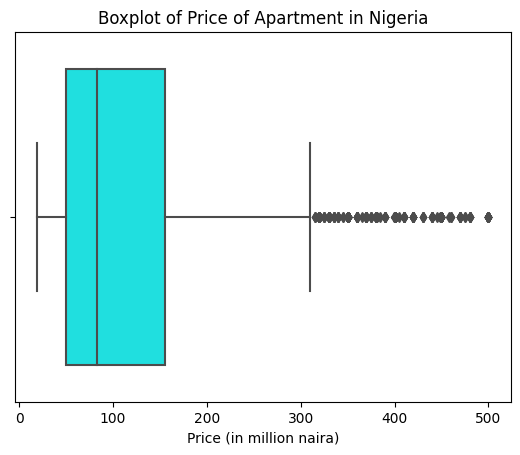

In [353]:
# Calculate the 7th and 93th percentiles of the 'price' column
low = df["price"].quantile(0.07)
high = df["price"].quantile(0.93)
old_shape = df.shape

# Create a boolean mask to identify the rows within the 7th and 93th percentiles
price_mask = (df["price"] >= low) & (df["price"] <= high)

# Apply the mask to the DataFrame to remove the outliers
df = df[price_mask]

# Get the new shape of the DataFrame after removing the outliers
new_shape = df.shape

print(f"The original DataFrame had shape: {old_shape}")
print(f"The new DataFrame after removing outliers has shape: {new_shape}")


#Boxplot after removing outlier in price feature
sns.boxplot(x=df["price"]/1e6, orient="h", color="cyan")
plt.xlabel("Price (in million naira)")
plt.title("Boxplot of Price of Apartment in Nigeria");


In [354]:
#The apartment with the minimum price
df[df["price"] == df["price"].min()]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
4999,3.0,3.0,3.0,2.0,Terraced Bungalow,Lekki,Lagos,19299375.0
8498,3.0,3.0,3.0,2.0,Terraced Bungalow,Ibeju Lekki,Lagos,19299375.0
9721,3.0,3.0,3.0,4.0,Semi Detached Bungalow,Ibeju Lekki,Lagos,19299375.0


## Exploring the Features

#### Housing Price: State and Town
Lets construct a barchat showing the town with the highest average house price for the top two states

In [355]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
1,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
2,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
3,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
4,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


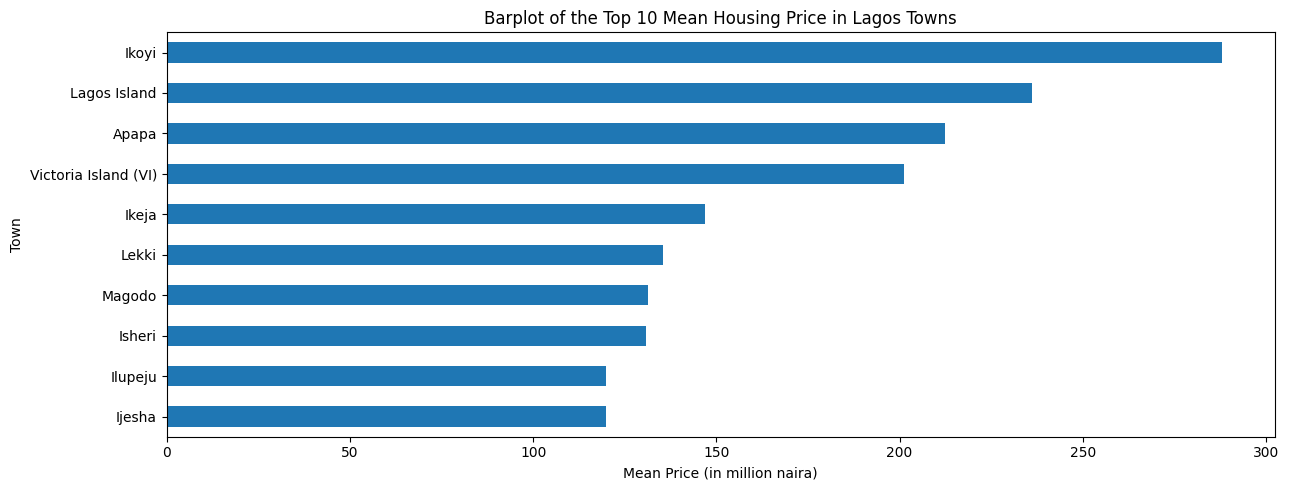

In [356]:
# Mean house price in Lagos State

fig, ax = plt.subplots(figsize=(13,5))
((df.groupby(["town"])["price"].mean())/1e6).sort_values().tail(10).plot.barh(ax=ax, ylabel="Town", xlabel="Mean Price (in million naira)",
                                                                           fontsize=10, title="Barplot of the Top 10 Mean Housing Price in Lagos Towns")
plt.tight_layout();

Ikoyi have the highest mean apartment price in Lagos state which is roughly `250 million naira`.

#### Housing Price: Space and Title

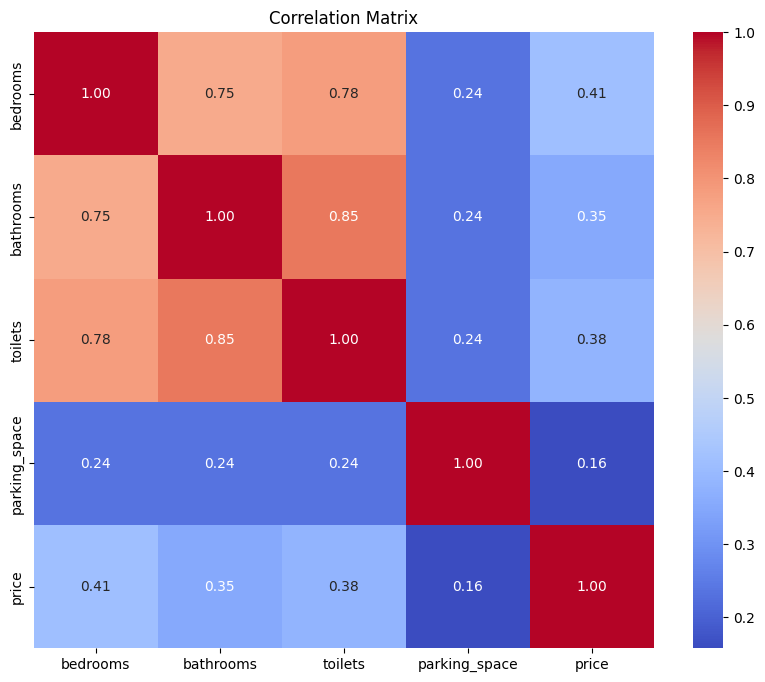

In [357]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap shows that there is a weak positive linear relationship between space and house price. Also, bedrooms, toilets, and bathrooms are highly correlated which is expected.

#### The distribution of housing title

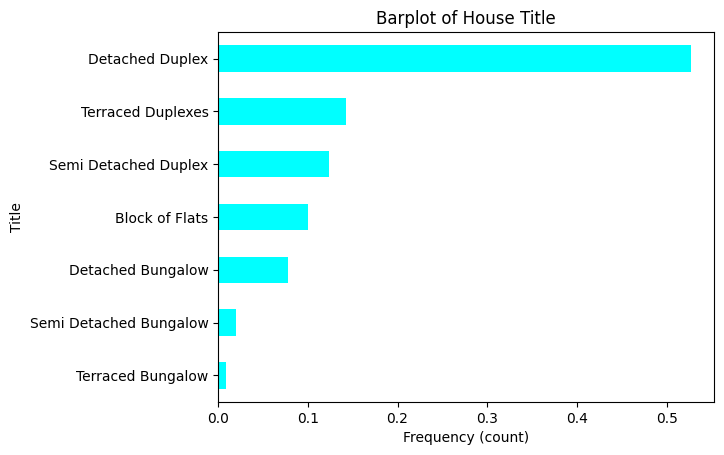

In [358]:
#barplot of the distribution of house title
df["title"].value_counts(normalize=True).sort_values().plot.barh(xlabel="Frequency (count)", color="cyan",
                                                                 ylabel="Title", title="Barplot of House Title");

Detached Duplex is the most frequent housing title in the dataset, accounting for approximately `55%` of the dataset.

#### House title and house price

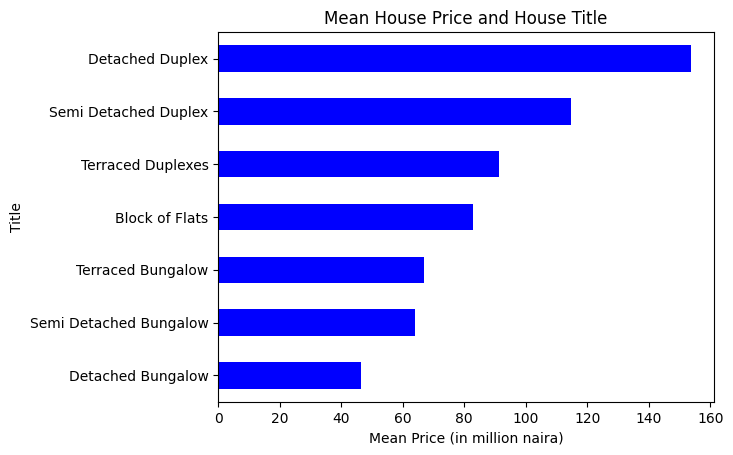

In [359]:
#barplot of house title and mean house price

(((df.groupby("title")["price"].mean())/1e6).sort_values()
 .plot.barh(xlabel="Mean Price (in million naira)", ylabel="Title", color="blue",
            title="Mean House Price and House Title"));

The average housing price vary significantly across the levels of house titles. `Detached Duplex` is expected to <br>be about 3 times as expensive as a `Detached Bungalow` on the average, keeping other factors constant.

Lets write a function that takes towns with less than 20 records and categorize them as `Other`

In [360]:
def categorize_as_other(dataset):
    # get the counts of each town

    state_count = dataset["town"].value_counts()
    
    # get towns less than 20
    less_than_20_town = state_count[state_count < 20].index.to_list()
    dict_less_than_20_town = {town: "Other" for town in less_than_20_town}
    
    # replacing each town with Others
    dataset.loc[:,"town"] = dataset["town"].replace(dict_less_than_20_town)
    
    return dataset 

In [361]:
df = df.drop("state", axis=1)
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,120000000.0
1,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,40000000.0
2,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,75000000.0
3,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,450000000.0
4,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,65000000.0


In [362]:
df["title"].unique()

array(['Detached Duplex', 'Semi Detached Duplex', 'Terraced Duplexes',
       'Block of Flats', 'Semi Detached Bungalow', 'Terraced Bungalow',
       'Detached Bungalow'], dtype=object)

In [363]:
df["town"].unique()

array(['Lekki', 'Ajah', 'Victoria Island (VI)', 'Ikeja', 'Magodo', 'Yaba',
       'Agege', 'Ikorodu', 'Isheri North', 'Isheri', 'Ikoyi', 'Ipaja',
       'Ibeju Lekki', 'Mushin', 'Ejigbo', 'Ojodu', 'Shomolu', 'Ogudu',
       'Isolo', 'Surulere', 'Alimosho', 'Ikotun', 'Maryland', 'Gbagada',
       'Idimu', 'Ifako-Ijaiye', 'Ojo', 'Kosofe', 'Ayobo', 'Ilupeju',
       'Ketu', 'Ojota', 'Oshodi', 'Amuwo Odofin', 'Agbara-Igbesa',
       'Ijaiye', 'Apapa', 'Lagos Island', 'Epe', 'Oke-Odo', 'Egbe',
       'Orile', 'Badagry', 'Ijesha'], dtype=object)

In [364]:
# #Categorizing towns with less than 20 records as Other
# df = categorize_as_other(df)
# df["town"].unique()

In [365]:
df.shape

(7348, 7)

## Encoding Categorical features

In [366]:
encoder = LabelEncoder()
encoded_column = ["title", "town"]

df_clean = df.copy()

# Fit and transform the columns
for col in encoded_column:
    df_clean[col] = encoder.fit_transform(df_clean[col])
    
df_clean.head(3)

,bedrooms,bathrooms,toilets,parking_space,title,town,price
0,4.0,5.0,5.0,4.0,2,29,120000000.0
1,4.0,4.0,5.0,6.0,2,2,40000000.0
2,4.0,4.0,5.0,2.0,4,29,75000000.0


In [367]:
df_clean.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
price            0
dtype: int64

# Model Training and Evaluation

In [368]:
# Split the dataset using 

X = df_clean.drop("price", axis=1)
y = df_clean['price']

# Rescale the input variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Linear Regression 

In [369]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)                                 

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print(f"Multiple Linear Regression RMSE: {rmse}")
print(f"Multiple Linear Regression  R-squared: {r2}")

Multiple Linear Regression RMSE: 91572650.74322799
Multiple Linear Regression  R-squared: 0.20095912579815223


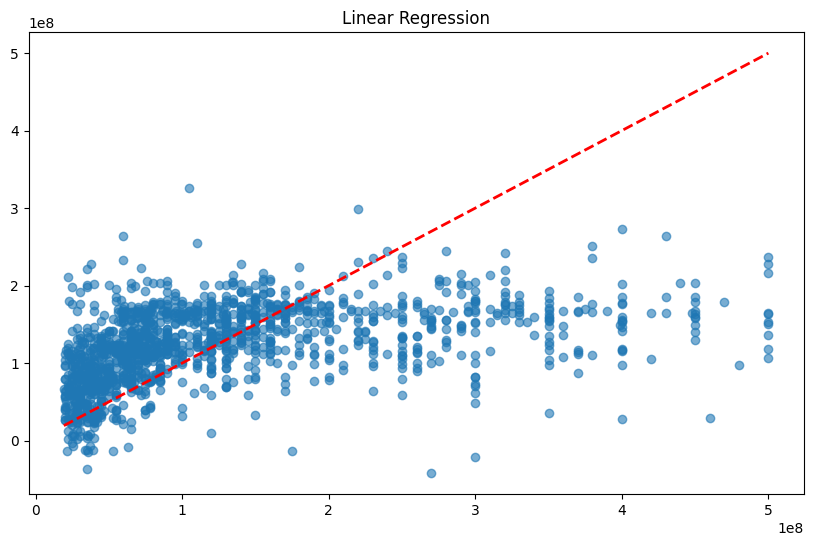

In [370]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')
plt.show()


## Gradient Boosting

In [371]:
gb_model = LinearRegression()
gb_model.fit(X_train, y_train)                                 

y_pred = gb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print(f"Multiple Linear Regression RMSE: {rmse}")
print(f"Multiple Linear Regression  R-squared: {r2}")

Multiple Linear Regression RMSE: 91572650.74322799
Multiple Linear Regression  R-squared: 0.20095912579815223


## Save the model

In [372]:
import pickle

# Save the model as a pickle file
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

### Test other models

In [373]:
# Define the models
models = {
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} RMSE: {rmse:.2f}  R-squared: {r2:.2f}\n")

Lasso Regression RMSE: 91572650.73  R-squared: 0.20

Ridge Regression RMSE: 91572600.23  R-squared: 0.20

Elastic Net RMSE: 91472100.20  R-squared: 0.20

Decision Tree Regressor RMSE: 79026630.28  R-squared: 0.40

Random Forest Regressor RMSE: 73760024.20  R-squared: 0.48

Gradient Boosting Regressor RMSE: 72265743.33  R-squared: 0.50

Support Vector Regressor RMSE: 110521013.63  R-squared: -0.16

XGBoost Regressor RMSE: 72705940.23  R-squared: 0.50

